In [3]:
import pandas as pd
import numpy as np
import joblib

from data import update_game
from model.model import update_models, update_model_scores, elasticnet, linear_svr, stacking, xgb

In [17]:
update_game(
    metacritic_url='https://www.metacritic.com/game/valkyria-chronicles/',
    title=None,
    #title='Rabi-Ribi',
    classic=False,
)

https://www.metacritic.com/game/valkyria-chronicles/ None
https://www.metacritic.com/game/valkyria-chronicles/ Valkyria Chronicles


Title          Valkyria Chronicles
My Rating                      NaN
raw_score                 3.860046
model_score                    NaN
Name: 576, dtype: object

In [2]:
np.log(10)/400

np.float64(0.005756462732485115)

In [18]:
update_model_scores()

In [4]:
df = pd.read_csv('game_log.csv')
df = df.loc[df.Finished == 1].copy()

In [6]:
df.Trials.describe()

count    313.000000
mean       9.041534
std        1.559154
min        4.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       13.000000
Name: Trials, dtype: float64

In [5]:
df.glicko.describe()

count     313.000000
mean     1201.188465
std       283.947791
min       480.537326
25%       994.001390
50%      1205.510067
75%      1398.242556
max      1945.255397
Name: glicko, dtype: float64

In [8]:
df[['Title', 'elo', 'glicko']]

,Title,elo,glicko
1,Super Mario Land,911.603258,946.069280
2,Sonic The Hedgehog 2,1017.489228,1332.769311
5,Super Metroid,1081.104002,1723.920409
7,Pokemon Red Version,1018.014710,1462.884758
9,Roboquest,1045.481111,1502.471183
...,...,...,...
513,Dragon Age: The Veilguard,980.206209,990.856784
514,Mass Effect,1064.767570,1619.710730
533,Cyberpunk 2077: Phantom Liberty,1074.892335,1633.117767
537,Doom (1993),1018.417624,1413.143416


In [64]:
df[['Title', 'elo']].sort_values('elo', ascending=False)

,Title,elo
440,Elden Ring,2067.101886
481,Baldur's Gate 3,1810.694651
297,Hollow Knight,1681.994949
504,Elden Ring: Shadow of the Erdtree,1679.548343
483,Armored Core VI: Fires of Rubicon,1553.496207
...,...,...
422,Vomitoreum,803.403294
132,NCAA Football 08,802.243787
59,James Bond 007: Nightfire,802.084705
40,Zoo Tycoon,793.627400


In [16]:
df['My Rating'].count()

np.int64(313)

In [17]:
df['Finished'] = df['My Rating'].notna().astype(int)

In [19]:
df['Trials'] = 0

In [20]:
df.to_csv('game_log.csv', index=False)

In [13]:
game_a = df.Title.sample(n=1).iloc[0]

In [34]:
df.loc[:, ['Title', 'elo']].sample(n=2**8).elo.idxmax()

np.int64(93)

In [45]:
competitors = df.loc[:, ['Title', 'elo']].sample(n=64).T
competitors

,411,347,292,544,138,184,529,215,332,396,...,497,27,374,455,275,353,525,181,249,88
Title,Cruelty Squad,Supraland,A Magical High School Girl,Braid,Gears of War,Danganronpa,Beyond Good And Evil,Spelunky,Darkest Dungeon,Vessels,...,Star Wars: Dark Forces Remaster,Planescape: Torment,Code Vein,The Last of Us Part I,SteamWorld Heist,Age of Wonders: Planetfall,Thief: The Dark Project,Sid Meier's Civilization V,Sid Meier's Civilization: Beyond Earth,Pokemon Emerald Version
elo,1000.0,1000.0,1000.0,1000.0,942.003652,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,884.613095,1000.0,1000.0,1000.0,1000.0,1052.48501,899.046384,1038.7729


In [51]:
competitors.idxmax(axis=1).elo

np.int64(49)

In [52]:
competitors.pop(competitors.idxmax(axis=1).elo).Title

'Jet Set Radio Future'

In [54]:
competitors.loc['elo']#.idxmax(axis=1)

411         1000.0
347         1000.0
292         1000.0
544         1000.0
138     942.003652
184         1000.0
529         1000.0
215         1000.0
332         1000.0
396         1000.0
385     917.615451
343         1000.0
496    1019.355782
403    1027.074463
257         1000.0
66      856.406297
23          1000.0
464         1000.0
207     995.423064
223         1000.0
312         1000.0
251    1067.475508
287     891.543236
124    1029.221642
276         1000.0
547         1000.0
114     962.639775
298     907.955985
191    1073.007165
558         1000.0
372    1013.789676
471    1074.859027
241     995.989328
570         1000.0
331         1000.0
162     934.028982
232    1013.626744
36      851.931796
469         1000.0
519         1000.0
390     986.433488
279         1000.0
255     997.012619
373         1000.0
358         1000.0
419         1000.0
51          1000.0
340     914.845155
421         1000.0
252         1000.0
497         1000.0
27          1000.0
374     884.

In [10]:
df.loc[:, ['Title', 'model_score'] + list(df.columns[df.columns.str.contains('hltb')])]

,Title,model_score,comp_lvl_co_hltb,count_comp_hltb,profile_popular_hltb,comp_100_hltb,count_speedrun_hltb,review_score_hltb,comp_lvl_mp_hltb,comp_main_count_hltb,...,comp_main_hltb,game_id_hltb,count_backlog_hltb,game_name_date_hltb,count_retired_hltb,comp_plus_count_hltb,count_playing_hltb,count_review_hltb,game_name_hltb,comp_lvl_combine_hltb
0,Earthbound,4.064434,1.0,2178.0,247.0,141116.0,4.0,88.0,1.0,428.0,...,100139.0,3034.0,3585.0,0.0,209.0,319.0,29.0,917.0,EarthBound,0.0
1,Super Mario Land,3.250997,0.0,2399.0,191.0,4913.0,7.0,68.0,0.0,671.0,...,3882.0,9380.0,609.0,0.0,70.0,83.0,8.0,898.0,Super Mario Land,1.0
2,Sonic The Hedgehog 2,3.594504,0.0,2517.0,204.0,11251.0,11.0,80.0,1.0,460.0,...,8804.0,8788.0,1092.0,0.0,113.0,104.0,16.0,927.0,Sonic the Hedgehog 2,0.0
3,Super Mario Bros.,4.288322,1.0,5444.0,318.0,8397.0,78.0,77.0,1.0,1141.0,...,6544.0,9371.0,1164.0,0.0,229.0,179.0,13.0,2016.0,Super Mario Bros.,0.0
4,Myst,2.701551,0.0,317.0,120.0,22375.0,4.0,75.0,0.0,72.0,...,19904.0,97062.0,456.0,1.0,34.0,60.0,15.0,115.0,Myst,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Cryptmaster,3.661620,0.0,50.0,96.0,63405.0,0.0,78.0,0.0,13.0,...,40192.0,126180.0,128.0,0.0,8.0,19.0,11.0,27.0,Cryptmaster,0.0
556,Pacific Drive,2.779227,0.0,281.0,466.0,172319.0,0.0,68.0,0.0,69.0,...,73516.0,113597.0,816.0,0.0,71.0,87.0,83.0,159.0,Pacific Drive,0.0
557,Yellow Taxi Goes Vroom,3.700169,0.0,51.0,96.0,45228.0,0.0,80.0,0.0,7.0,...,19653.0,132086.0,103.0,0.0,8.0,15.0,5.0,26.0,Yellow Taxi Goes Vroom,0.0
558,Lorelei and the Laser Eyes,4.076134,0.0,230.0,401.0,86155.0,0.0,85.0,0.0,32.0,...,58897.0,109862.0,308.0,0.0,11.0,94.0,41.0,119.0,Lorelei and the Laser Eyes,0.0


In [6]:
df.loc[df.Title == 'Doki Doki Ragnarok', df.columns.str.contains('hltb')]

,comp_lvl_co_hltb,count_comp_hltb,profile_popular_hltb,comp_100_hltb,count_speedrun_hltb,review_score_hltb,comp_lvl_mp_hltb,comp_main_count_hltb,game_type_hltb,comp_lvl_sp_hltb,...,comp_main_hltb,game_id_hltb,count_backlog_hltb,game_name_date_hltb,count_retired_hltb,comp_plus_count_hltb,count_playing_hltb,count_review_hltb,game_name_hltb,comp_lvl_combine_hltb
398,0.0,3.0,7.0,10800.0,0.0,0.0,0.0,1.0,game,1.0,...,6840.0,114687.0,3.0,0.0,0.0,0.0,0.0,0.0,Doki Doki Ragnarok,0.0


<Axes: xlabel='My Rating'>

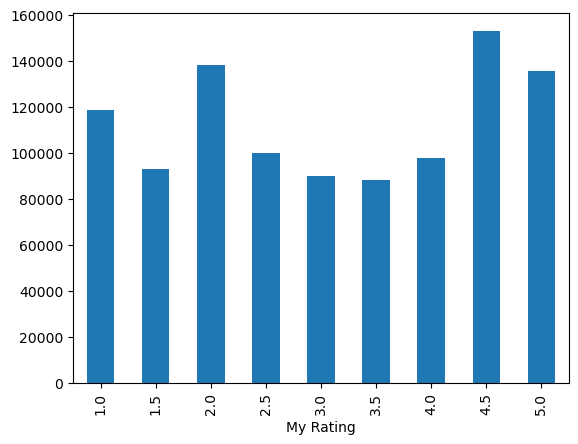

In [11]:
df.groupby('My Rating').comp_all_hltb.mean().plot.bar()

In [17]:
np.append(np.logspace(-4,0,5), 0)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 0.e+00])

In [13]:
import numpy as np

In [31]:
df

,numReviews,id_igdb,age_ratings_igdb,game_modes_igdb,model_score,category_igdb,release_date,count_playing_hltb,count_review_hltb,comp_100_count_hltb,...,metaScore_metacritic,comp_plus_count_hltb,hasLootBoxes,matches,Unnamed: 0,involved_companies_igdb,genre_metacritic,baseGame,invested_co_count_hltb,themes_igdb
0,NaN,78559.0,NaN,[1],4.064434,0.0,1983-12-31,29.0,917.0,83.0,...,NaN,319.0,False,NaN,0.0,[83321],JRPG,NaN,1.0,"[17, 43]"
1,NaN,1069.0,"[15685, 49061, 96230]",[1],3.250997,0.0,1989-04-21,8.0,898.0,140.0,...,NaN,83.0,NaN,NaN,1.0,"[97487, 97488, 225086, 259805]",NaN,NaN,1.0,"[1, 17, 18]"
2,NaN,202256.0,NaN,[1],3.594504,11.0,1992-12-31,16.0,927.0,123.0,...,83.0,104.0,NaN,NaN,2.0,[171864],2D Platformer,NaN,2.0,[1]
3,NaN,222095.0,NaN,"[1, 2]",4.288322,9.0,1993-07-14,13.0,2016.0,272.0,...,NaN,179.0,NaN,NaN,3.0,"[191356, 191357]",2D Platformer,NaN,5.0,"[1, 17]"
4,13.0,236.0,"[32758, 32759]",[1],2.701551,0.0,1993-09-24,15.0,115.0,49.0,...,78.0,60.0,False,NaN,4.0,"[118999, 119000, 126028, 234846, 234847]",First-Person Adventure,NaN,0.0,"[17, 43]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,11.0,213029.0,[186244],[1],3.661620,0.0,2024-05-09,11.0,27.0,2.0,...,77.0,19.0,False,NaN,NaN,[287347],RPG,NaN,0.0,[17]
556,73.0,217592.0,"[164056, 164057, 168702, 169139]",[1],2.779227,0.0,2024-02-22,83.0,159.0,25.0,...,79.0,87.0,False,NaN,NaN,"[221409, 221410]",Survival,NaN,0.0,"[1, 21]"
557,7.0,216805.0,NaN,[1],3.700169,0.0,2024-04-09,5.0,26.0,13.0,...,78.0,15.0,False,NaN,NaN,"[202314, 202315]",3D Platformer,NaN,0.0,"[1, 27]"
558,52.0,206806.0,"[173349, 173790]",[1],4.076134,0.0,2024-05-16,41.0,119.0,34.0,...,88.0,94.0,False,NaN,NaN,"[296023, 296024]",Adventure,NaN,0.0,[1]


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Game Boy Advance, Super Nintendo

In [53]:
df['profile_platform_hltb'].astype(str).str.split(', ').astype(str)

0                 ['Game Boy Advance', 'Super Nintendo']
1                                           ['Game Boy']
2      ['Mobile', 'Nintendo 3DS', 'Nintendo Switch', ...
3      ['Arcade', 'Game & Watch', 'Game Boy Advance',...
4      ['Mac', 'Meta Quest', 'PC', 'Xbox One', 'Xbox ...
                             ...                        
555    ['PC', 'PlayStation 4', 'PlayStation 5', 'Xbox...
556                              ['PC', 'PlayStation 5']
557                                               ['PC']
558    ['Nintendo Switch', 'PC', 'PlayStation 4', 'Pl...
559                                               ['PC']
Name: profile_platform_hltb, Length: 560, dtype: object

In [54]:
CountVectorizer(input='content').fit_transform()

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2600 stored elements and shape (560, 51)>

In [1]:
from model.core import load_Xy

X,y = load_Xy()

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [9]:
X = X.loc[:, X.dtypes != 'object'].fillna(0)

In [10]:
linear = LinearRegression()
linear.fit(X, y)

LinearRegression()

In [12]:
sgd = SGDRegressor(penalty=None, alpha=0)
sgd.fit(X, y)

SGDRegressor(alpha=0, penalty=None)

In [13]:
linear.predict(X)

array([3.28169298, 4.00125063, 3.97840482, 3.81700478, 3.73197661,
       3.8629184 , 4.27079907, 4.03998903, 1.43736593, 2.57177254,
       3.01878235, 3.02500919, 3.11121219, 4.35556384, 3.92695547,
       3.08453602, 3.18684669, 3.13321607, 3.11045181, 1.82633838,
       2.9285197 , 3.16590781, 4.42303997, 3.08391992, 4.56198328,
       3.41934035, 4.30375737, 3.3407435 , 3.15577018, 3.33198228,
       4.41491227, 4.55957218, 4.18040948, 3.09148144, 4.26296213,
       4.57281571, 3.43384887, 3.23507403, 3.49315461, 2.5804283 ,
       3.12217337, 4.73644484, 3.30098022, 3.20039672, 3.37155058,
       3.24470701, 3.50195085, 3.20962451, 3.01308495, 3.36118126,
       3.13240253, 3.19926862, 3.14464794, 2.80756358, 3.3425579 ,
       3.6044039 , 3.48286329, 3.41138197, 3.52175919, 4.47080537,
       3.37299894, 3.4492179 , 3.14460684, 3.31599377, 4.43454021,
       4.26465572, 2.82371328, 2.94546954, 3.56308287, 3.31578597,
       2.87138242, 3.48754133, 3.17976543, 3.56066705, 3.52625

In [14]:
sgd.predict(X)

array([-1.84781230e+16, -9.22310139e+15,  2.17016702e+14,  1.44094829e+16,
       -3.21793555e+16,  3.09377935e+17, -1.72010595e+16, -1.03356837e+16,
       -3.31889638e+16, -2.29985980e+16, -2.45819792e+16, -1.48428801e+16,
       -2.49749947e+16, -3.83697936e+16,  4.78996285e+15, -2.31841685e+16,
       -2.47772537e+16, -2.16384881e+16, -2.63835523e+16, -2.96835472e+16,
        6.44801260e+15, -1.79795683e+16,  4.47147055e+15, -2.88645430e+16,
       -1.29901987e+16, -2.32138040e+16, -2.57954307e+16, -2.86605425e+16,
       -2.13623338e+16, -1.57279086e+16,  7.27047097e+15,  1.14910179e+16,
        1.25180767e+16, -2.17500910e+16,  2.98822673e+16, -2.33746495e+15,
       -1.93716138e+16, -1.53726875e+16, -1.10918605e+16, -1.85811529e+16,
       -2.30761886e+16,  2.34834773e+16, -2.54582983e+16, -2.46761347e+16,
       -2.55509756e+16, -1.76373943e+16, -7.67179534e+15, -2.67647148e+16,
       -2.67647989e+16, -2.64152019e+16, -1.45695439e+16, -1.54090073e+16,
       -2.62756054e+16, -

In [50]:
gmm = GaussianMixture(n_components=4)
df['tier'] = gmm.fit_predict(df.loc[:, 'model_score'].to_frame())

C:\Users\derek\miniconda3\envs\backlog\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [51]:
df.groupby('tier').model_score.mean()

tier
0    3.143376
1    4.430236
2    2.309359
3    3.734972
Name: model_score, dtype: float64

In [37]:
pd.Series(gmm.predict(df.loc[:, 'model_score'].to_frame())).value_counts()

1    450
0    111
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

In [8]:
df.loc[df.loc[:, 'model_score'].isnull(), 'model_score'] = 3.5

In [9]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

In [10]:
param_grid = {
    "n_components": range(1, 21),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

In [12]:

backlog_df = df.loc[df['My Rating'].isnull(), :]

backlog_df['model_score'] = backlog_df['raw_score'].copy()
#backlog_df['model_score'] = adjust_sequels(backlog_df)

grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(backlog_df['model_score'].to_frame())

C:\Users\derek\AppData\Local\Temp\ipykernel_9160\3681943458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backlog_df['model_score'] = backlog_df['raw_score'].copy()
C:\Users\derek\miniconda3\envs\backlog\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derek\miniconda3\envs\backlog\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 21)},
             scoring=<function gmm_bic_score at 0x000001B4379F4D60>)

In [14]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_covariance_type,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003011,0.000382,0.000699,0.000086,spherical,1,"{'covariance_type': 'spherical', 'n_components...",-120.955559,-98.255226,-109.195048,-96.617708,-100.509954,-105.106699,9.033678,3
1,0.004741,0.000688,0.000734,0.000152,spherical,2,"{'covariance_type': 'spherical', 'n_components...",-135.846704,-111.112704,-120.852338,-106.679442,-110.470454,-116.992328,10.524710,7
2,0.003860,0.000440,0.000658,0.000105,spherical,3,"{'covariance_type': 'spherical', 'n_components...",-148.704203,-118.062111,-131.718894,-118.220933,-128.971207,-129.135470,11.237284,11
3,0.004059,0.000176,0.000636,0.000043,spherical,4,"{'covariance_type': 'spherical', 'n_components...",-159.586980,-130.987658,-143.183989,-132.522810,-145.603027,-142.376893,10.335028,17
4,0.004355,0.000420,0.000601,0.000008,spherical,5,"{'covariance_type': 'spherical', 'n_components...",-172.621381,-142.137014,-156.595800,-145.821611,-153.242403,-154.083642,10.598580,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.010624,0.000942,0.000745,0.000072,full,16,"{'covariance_type': 'full', 'n_components': 16}",-350.246391,-296.731085,-298.570523,-280.611612,-314.912795,-308.214481,23.657310,67
76,0.011034,0.000949,0.000936,0.000189,full,17,"{'covariance_type': 'full', 'n_components': 17}",-363.701078,-314.160983,-315.842152,-291.828039,-326.018819,-322.310214,23.513257,71
77,0.011776,0.001710,0.000855,0.000085,full,18,"{'covariance_type': 'full', 'n_components': 18}",-383.841746,-324.369372,-319.581075,-314.899240,-337.327189,-336.003724,25.062676,73
78,0.014519,0.005178,0.000829,0.000117,full,19,"{'covariance_type': 'full', 'n_components': 19}",-372.434709,-342.131093,-347.001118,-335.222320,-350.275593,-349.412967,12.577455,75


In [ ]:
df.buyer_aids.str